## **Level 1: Basic Concepts**

### **Q1. Simple Word Tokenization**
 Write a Python function that tokenizes a sentence into words using:

 a) split() method

 b) Regular expressions

 c) NLTK's word_tokenize()


In [2]:
input1 = "Natural Language Processing is amazing!"

#split() method
def tokenize_split(text):
  return text.split()
print("Split(): ",tokenize_split(input1))

Split():  ['Natural', 'Language', 'Processing', 'is', 'amazing!']


In [3]:
#Regular expressions
import re
def tokenize_regex(text):
  return re.findall(r'\b\w+\b', text)
print("Regular expressions: ",tokenize_regex(input1))

Regular expressions:  ['Natural', 'Language', 'Processing', 'is', 'amazing']


In [4]:
#nltk's word_tokenize
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def tokenize_nltk(text):
  return word_tokenize(text)
print("NLTK's word_tokenize: ",tokenize_nltk(input1))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK's word_tokenize:  ['Natural', 'Language', 'Processing', 'is', 'amazing', '!']


### **Q2. Character Tokenization**
 Create a function that converts text into character-level tokens, including spaces

In [5]:
def char_tokenize(text: str):
  return list(text)

print(char_tokenize("NLP"))

['N', 'L', 'P']


### **Q3. Whitespace vs Punctuation**
 Compare the outputs of whitespace tokenization vs. word tokenization that handles
 punctuation.

In [6]:
input3= "Hello, world! How's it going?"

def whitespace_tokenize(text):
  return text.split()
print("whitespace_tokenize: ",whitespace_tokenize(input3))

def word_tokenize(text):
  return nltk.word_tokenize(text)
print("word_tokenize: ",word_tokenize(input3))

whitespace_tokenize:  ['Hello,', 'world!', "How's", 'it', 'going?']
word_tokenize:  ['Hello', ',', 'world', '!', 'How', "'s", 'it', 'going', '?']


##**Level 2: Library-Based Tokenization**
 ### **Q4. NLTK Tokenizers**
 Write code to tokenize the following text using:

In [8]:
input4 = "Dr. Smith works at A.I. Corp. She loves NLP! Does she?"

from nltk.tokenize import sent_tokenize,RegexpTokenizer

words = word_tokenize(input4)
print("Word Tokenization:", words)

sentences = sent_tokenize(input4)
print("Sentence Tokenization:", sentences)

regexp_tokenizer = RegexpTokenizer(r'\w+')
regex_tokens = regexp_tokenizer.tokenize(input4)
print("Regexp Tokenization:", regex_tokens)


Word Tokenization: ['Dr.', 'Smith', 'works', 'at', 'A.I', '.', 'Corp.', 'She', 'loves', 'NLP', '!', 'Does', 'she', '?']
Sentence Tokenization: ['Dr. Smith works at A.I.', 'Corp. She loves NLP!', 'Does she?']
Regexp Tokenization: ['Dr', 'Smith', 'works', 'at', 'A', 'I', 'Corp', 'She', 'loves', 'NLP', 'Does', 'she']


### **Q5. spaCy Tokenization**
 Use spaCy to tokenize and identify:
 Tokens
 Lemmas
 Part-of-speech tags

In [9]:
input5 =  "The runners are running faster than expected."

import spacy
# Load English small model
nlp = spacy.load("en_core_web_sm")

# NLP pipeline
doc = nlp(input5)

print(f"{'Token':<12}{'Lemma':<12}{'POS':<8}")
print("-"*32)
for token in doc:
    print(f"{token.text:<12}{token.lemma_:<12}{token.pos_:<8}")


Token       Lemma       POS     
--------------------------------
The         the         DET     
runners     runner      NOUN    
are         be          AUX     
running     run         VERB    
faster      fast        ADV     
than        than        SCONJ   
expected    expect      VERB    
.           .           PUNCT   


 ### **Q6. Handling Contractions**
 Write a function to properly tokenize contractions

In [12]:
input6 =  "I'm doesn't can't won't"

#!pip install contractions
import contractions

# Expand contractions
def expand_contractions(text):
    expanded = contractions.fix(text)
    tokens = word_tokenize(expanded)
    return tokens

tokens = expand_contractions(input6)
print(tokens)


['I', 'am', 'does', 'not', 'can', 'not', 'will', 'not']


## **Level 3: Subword Tokenization**
 ### **Q7. Byte Pair Encoding (BPE)**
 Implement a simple BPE tokenizer from scratch that:
 - Starts with character-level tokens
 - Merges the most frequent pair iteratively

In [15]:
input7 = ["low", "lower", "lowest", "newer", "wider"]

from collections import Counter, defaultdict

def get_stats(vocab):
    pairs = Counter()
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[(symbols[i], symbols[i+1])] += freq
    return pairs

def merge_vocab(pair, vocab):
    merged_vocab = {}
    bigram = ' '.join(pair)
    replacement = ''.join(pair)
    for word in vocab:
        new_word = word.replace(bigram, replacement)
        merged_vocab[new_word] = vocab[word]
    return merged_vocab

vocab = {' '.join(list(word)) + ' </w>': 1 for word in input7}

print("Initial Vocabulary:")
for k in vocab:
    print(k)

num_merges = 5
for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
        break
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
    print(f"\nMerge {i+1}: {best}")
    for k in vocab:
        print(k)

Initial Vocabulary:
l o w </w>
l o w e r </w>
l o w e s t </w>
n e w e r </w>
w i d e r </w>

Merge 1: ('l', 'o')
lo w </w>
lo w e r </w>
lo w e s t </w>
n e w e r </w>
w i d e r </w>

Merge 2: ('lo', 'w')
low </w>
low e r </w>
low e s t </w>
n e w e r </w>
w i d e r </w>

Merge 3: ('e', 'r')
low </w>
low er </w>
low e s t </w>
n e w er </w>
w i d er </w>

Merge 4: ('er', '</w>')
low </w>
low er</w>
low e s t </w>
n e w er</w>
w i d er</w>

Merge 5: ('low', '</w>')
low</w>
low er</w>
low e s t </w>
n e w er</w>
w i d er</w>


### **Q8. Hugging Face Tokenizers**
 Use transformers library to tokenize with:
- BERT tokenizer
 - GPT-2 tokenizer
 - T5 tokenizer
 "Tokenization is fundamental!"

 Text:"Tokenization is fundamental!"

 Task: Compare vocabulary handling and special tokens


In [18]:
from transformers import BertTokenizer, GPT2Tokenizer, T5Tokenizer

input8 = "Tokenization is fundamental!"

def compare_tokenizers(text):
    result = {}

    # BERT
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    bert_tokens = bert_tokenizer.tokenize(text)
    bert_ids = bert_tokenizer.encode(text)
    bert_special = {'cls_token': bert_tokenizer.cls_token,
                    'sep_token': bert_tokenizer.sep_token,
                    'pad_token': bert_tokenizer.pad_token}
    result['BERT'] = {'tokens': bert_tokens, 'ids': bert_ids, 'special_tokens': bert_special}

    # GPT-2
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    gpt2_tokens = gpt2_tokenizer.tokenize(text)
    gpt2_ids = gpt2_tokenizer.encode(text)
    # GPT-2 không có CLS/SEP
    gpt2_special = {'cls_token': gpt2_tokenizer.cls_token,
                    'sep_token': gpt2_tokenizer.sep_token,
                    'pad_token': gpt2_tokenizer.pad_token}
    result['GPT-2'] = {'tokens': gpt2_tokens, 'ids': gpt2_ids, 'special_tokens': gpt2_special}

    # T5
    t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
    t5_tokens = t5_tokenizer.tokenize(text)
    t5_ids = t5_tokenizer.encode(text)
    t5_special = {'pad_token': t5_tokenizer.pad_token,
                   'eos_token': t5_tokenizer.eos_token,
                   'unk_token': t5_tokenizer.unk_token}
    result['T5'] = {'tokens': t5_tokens, 'ids': t5_ids, 'special_tokens': t5_special}

    return result

res = compare_tokenizers(input8)
for model, info in res.items():
    print(f"\n--- {model} ---")
    print("Tokens:", info['tokens'])
    print("Token IDs:", info['ids'])
    print("Special tokens:", info['special_tokens'])



--- BERT ---
Tokens: ['token', '##ization', 'is', 'fundamental', '!']
Token IDs: [101, 19204, 3989, 2003, 8050, 999, 102]
Special tokens: {'cls_token': '[CLS]', 'sep_token': '[SEP]', 'pad_token': '[PAD]'}

--- GPT-2 ---
Tokens: ['Token', 'ization', 'Ġis', 'Ġfundamental', '!']
Token IDs: [30642, 1634, 318, 7531, 0]
Special tokens: {'cls_token': None, 'sep_token': None, 'pad_token': None}

--- T5 ---
Tokens: ['▁To', 'ken', 'ization', '▁is', '▁fundamental', '!']
Token IDs: [304, 2217, 1707, 19, 4431, 55, 1]
Special tokens: {'pad_token': '<pad>', 'eos_token': '</s>', 'unk_token': '<unk>'}


### **Q9. WordPiece Tokenization**
 Tokenize the following using BERT's WordPiece:

 Input: "unhappiness"

 Expected:['un', '##hap', '##pi', '##ness']

In [24]:
input9 = "unhappiness"

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize(input9)
print(tokens)

['un', '##ha', '##pp', '##iness']


## **Level 4: Advanced Challenges**
 ### **Q10. Custom Tokenizer Class**
 Create a
CustomTokenizer
 class with methods:
 - fit(corpus) - builds vocabulary
 - tokenize(text)- tokenizes
 - text vocab_size() - returns vocabulary size
 - encode(text) - converts to token IDs
 - decode(ids) - converts IDs back to text

In [25]:
class CustomTokenizer:
    def __init__(self):
        self.vocab = {}      # token -> id
        self.id2token = {}   # id -> token

    def fit(self, corpus):
        token_freq = defaultdict(int)
        for text in corpus:
            tokens = self.tokenize(text)
            for t in tokens:
                token_freq[t] += 1

        # Sort tokens by frequency (optional) and assign IDs
        self.vocab = {token: idx for idx, token in enumerate(token_freq.keys())}
        self.id2token = {idx: token for token, idx in self.vocab.items()}

    #  Tokenize text
    def tokenize(self, text):
        tokens = text.lower().replace('.', ' .').replace(',', ' ,').split()
        return tokens

    # Vocabulary size
    def vocab_size(self):
        return len(self.vocab)

    # Encode text to token IDs
    def encode(self, text):
        tokens = self.tokenize(text)
        return [self.vocab[t] for t in tokens if t in self.vocab]

    # Decode IDs to text
    def decode(self, ids):
        tokens = [self.id2token[i] for i in ids if i in self.id2token]
        return ' '.join(tokens)

corpus = [
    "Tokenization is fundamental.",
    "Custom tokenizer class example."
]

tokenizer = CustomTokenizer()
tokenizer.fit(corpus)

print("Vocabulary:", tokenizer.vocab)
print("Vocabulary size:", tokenizer.vocab_size())

text = "Tokenization is example."
ids = tokenizer.encode(text)
print("Encoded IDs:", ids)
print("Decoded text:", tokenizer.decode(ids))


Vocabulary: {'tokenization': 0, 'is': 1, 'fundamental': 2, '.': 3, 'custom': 4, 'tokenizer': 5, 'class': 6, 'example': 7}
Vocabulary size: 8
Encoded IDs: [0, 1, 7, 3]
Decoded text: tokenization is example .


### **Q11. Handling Multiple Languages**
 Write a tokenizer that correctly handles:

English: "Hello world"

Chinese: "你好世界"

Mixed: "Hello 世界"

Hint: Use language-specific tokenizers


In [30]:
import jieba

class MultiLangTokenizer:
    def __init__(self):
        pass

    def tokenize(self, text):
        tokens = []
        # Tách English bằng regex
        english_words = re.findall(r'[a-zA-Z]+', text)
        # Tách Chinese bằng jieba
        chinese_words = jieba.lcut(text)

        i = 0
        while i < len(text):
            c = text[i]
            if re.match(r'[a-zA-Z]', c):
                word = c
                i += 1
                while i < len(text) and re.match(r'[a-zA-Z]', text[i]):
                    word += text[i]
                    i += 1
                tokens.append(word)
            elif re.match(r'[\u4e00-\u9fff]', c):
                word = ''
                for seg in chinese_words:
                    if seg in text[i:]:
                        word = seg
                        i += len(seg)
                        tokens.append(word)
                        break
            else:
                # Dấu câu hoặc space
                if not c.isspace():
                    tokens.append(c)
                i += 1
        return tokens

# Example usage
tokenizer = MultiLangTokenizer()

input11 = [
    "Hello world",     # English
    "你好世界",         # Chinese
    "Hello 世界"       # Mixed
]

for t in input11:
    print(f"Input: {t}")
    print("Tokens:", tokenizer.tokenize(t))
    print()


Input: Hello world
Tokens: ['Hello', 'world']

Input: 你好世界
Tokens: ['你好', '世界']

Input: Hello 世界
Tokens: ['Hello', '世界']



### **Q12. Token Normalization**
 Implement a pipeline that:
 1. Converts to lowercase
 2. Removes punctuation
 3. Tokenizes
 4. Removes stopwords
 5. Applies stemming/lemmatization

 Input: "The quick brown foxes are jumping over the lazy dogs!"

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


def normalize_text_nltk(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3. Tokenize
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]

    # 5. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens]

    return tokens

input12 = "The quick brown foxes are jumping over the lazy dogs!"
normalized_tokens = normalize_text_nltk(input12)
print(normalized_tokens)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']


## **Level 5: Performance & Edge Cases**
 ### **Q13. Tokenization Speed Benchmark**
 Compare the speed of different tokenizers on a large corpus (100K sentences):

 - str.split()
 - NLTK
 - spaCy
 - Hugging Face Fast Tokenizers

In [48]:
import time
import random
from transformers import AutoTokenizer

corpus_size = 100000  # 100K sentences
words = ["tokenization", "is", "fundamental", "for", "NLP", "example", "model",
         "data", "learning", "python", "language", "text", "analysis"]
corpus = [" ".join(random.choices(words, k=10)) for _ in range(corpus_size)]
print("Corpus created with", len(corpus), "sentences.")

#str.split()
start = time.time()
split_tokens = [sentence.split() for sentence in corpus]
end = time.time()
print("str.split() time:", round(end - start, 3), "s")

#NLTK
start = time.time()
nltk_tokens = [word_tokenize(sentence) for sentence in corpus]
end = time.time()
print("NLTK time:", round(end - start, 3), "s")

#spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
start = time.time()
spacy_tokens = [[token.text for token in doc] for doc in nlp.pipe(corpus, batch_size=1000)]
end = time.time()
print("spaCy time:", round(end - start, 3), "s")

#Hugging Face Fast Tokenizer
hf_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)
start = time.time()
hf_tokens = [hf_tokenizer.tokenize(sentence) for sentence in corpus]
end = time.time()
print("Hugging Face Fast Tokenizer time:", round(end - start, 3), "s")


Corpus created with 100000 sentences.
str.split() time: 0.953 s
NLTK time: 9.077 s
spaCy time: 86.648 s
Hugging Face Fast Tokenizer time: 12.167 s


###**Q14. Vocabulary Size Optimization**
 Given a corpus, implement a function that:
 - Creates vocabularies of different sizes (1K, 5K, 10K, 50K)
 - Calculates out-of-vocabulary (OOV) rate for each
 - Plots vocab size vs. OOV rate

Vocab size: 1000, OOV rate: 0.771
Vocab size: 5000, OOV rate: 0.000
Vocab size: 10000, OOV rate: 0.000
Vocab size: 50000, OOV rate: 0.000


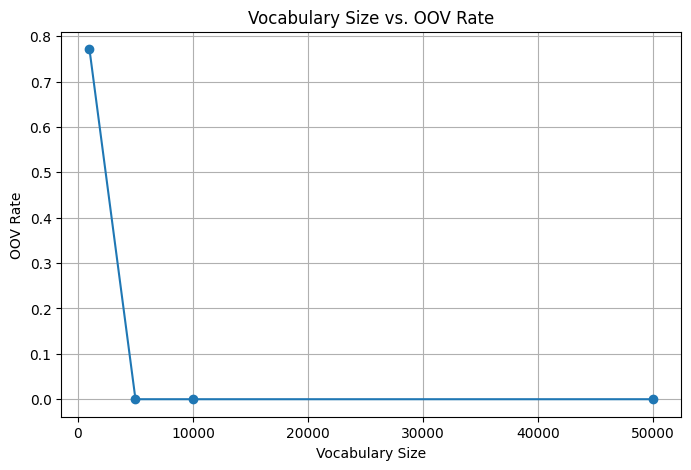

In [49]:
import matplotlib.pyplot as plt

corpus_size = 50000  # 50K sentences
# Tạo 5000 từ ngẫu nhiên
vocab_pool = [''.join(random.choices(string.ascii_lowercase, k=5)) for _ in range(5000)]

# Tạo corpus 50K câu, mỗi câu 10 từ
corpus = [" ".join(random.choices(vocab_pool, k=10)) for _ in range(50000)]

tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]

# Flatten list of tokens
all_tokens = [token for sentence in tokenized_corpus for token in sentence]

# Count frequency
token_freq = Counter(all_tokens)

#3. Function: calculate OOV rate
def oov_rate(corpus_tokens, vocab_size):
    # Get top vocab_size tokens
    vocab = set([token for token, freq in token_freq.most_common(vocab_size)])
    total_tokens = sum(len(sentence) for sentence in corpus_tokens)
    oov_count = sum(1 for sentence in corpus_tokens for token in sentence if token not in vocab)
    return oov_count / total_tokens  # OOV rate

#4. Test for different vocab sizes
vocab_sizes = [1000, 5000, 10000, 50000]
oov_rates = []

for vs in vocab_sizes:
    rate = oov_rate(tokenized_corpus, vs)
    oov_rates.append(rate)
    print(f"Vocab size: {vs}, OOV rate: {rate:.3f}")

#5. Plot vocab size vs. OOV rate
plt.figure(figsize=(8,5))
plt.plot(vocab_sizes, oov_rates, marker='o')
plt.xlabel("Vocabulary Size")
plt.ylabel("OOV Rate")
plt.title("Vocabulary Size vs. OOV Rate")
plt.grid(True)
plt.show()


###**Q15. Special Tokens Handling**
 Create a tokenizer that properly handles:

-  URLs:  "Visit https://example.com"
- Emails: "contact@email.com"
- Hashtags: "#NLP #DeepLearning"
- Mentions: "@username"
- Emojis: "I love NLP "

In [40]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.6 MB/s eta 0:00:00


In [44]:
import emoji

class SocialMediaTokenizer:
    def __init__(self):
        self.url_pattern = r'https?://\S+'
        self.email_pattern = r'\b[\w.-]+@[\w.-]+\.\w+\b'
        self.hashtag_pattern = r'#\w+'
        self.mention_pattern = r'@\w+'
        self.emoji_pattern = re.compile("|".join(map(re.escape, emoji.EMOJI_DATA.keys())))
        self.word_pattern = r'\b\w+\b'

    def tokenize(self, text):
        tokens = []

        for pattern in [self.url_pattern, self.email_pattern, self.hashtag_pattern, self.mention_pattern, self.emoji_pattern]:
            matches = re.findall(pattern, text)
            for m in matches:
                tokens.append(m)
                text = text.replace(m, ' ')

        # Remaining words
        words = re.findall(self.word_pattern, text)
        tokens.extend(words)

        return tokens

#Example Usage
tokenizer = SocialMediaTokenizer()

texts = [
    "Visit https://example.com",
    "contact@email.com",
    "#NLP #DeepLearning",
    "@username",
    "I love NLP ❤️"
]

for t in texts:
    print(f"Input: {t}")
    print("Tokens:", tokenizer.tokenize(t))
    print()

Input: Visit https://example.com
Tokens: ['https://example.com', 'Visit']

Input: contact@email.com
Tokens: ['contact@email.com']

Input: #NLP #DeepLearning
Tokens: ['#NLP', '#DeepLearning']

Input: @username
Tokens: ['@username']

Input: I love NLP ❤️
Tokens: ['❤️', 'I', 'love', 'NLP']



## **Bonus: Real-World Application**
 ### **Q16. Sentiment Analysis Preprocessing**
 Build a complete tokenization pipeline for sentiment analysis:
 - Clean HTML tags
- Handle negations (n't, not)
- Preserve emoticons
- Create bigrams for important phrases
- Pad sequences to fixed length

 *Test on: Amazon reviews dataset*

In [46]:
from bs4 import BeautifulSoup
from nltk.util import ngrams
from nltk.corpus import stopwords

class SentimentPre:
    def __init__(self, sequence_length=20):
        self.sequence_length = sequence_length
        self.stop_words = set(stopwords.words('english'))

    #Clean HTML
    def clean_html(self, text):
        return BeautifulSoup(text, "html.parser").get_text()

    #Handle negations
    def handle_negations(self, tokens):
        # Convert "isn't" -> "is not"
        neg_pattern = re.compile(r"(\w+)n't\b")
        new_tokens = []
        for t in tokens:
            match = neg_pattern.match(t)
            if match:
                new_tokens.extend([match.group(1), 'not'])
            else:
                new_tokens.append(t)
        return new_tokens

    #Preserve emoticons
    def preserve_emoticons(self, text):
        # Simple regex for emoticons
        emoticon_pattern = r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/:}{@|\\]'
        emoticons = re.findall(emoticon_pattern, text)
        return emoticons

    #Tokenize text
    def tokenize(self, text):
        text = self.clean_html(text)
        tokens = word_tokenize(text.lower())
        tokens = [t for t in tokens if t not in self.stop_words]
        tokens = self.handle_negations(tokens)
        return tokens

    #Create bigrams
    def create_bigrams(self, tokens):
        bigram_list = list(ngrams(tokens, 2))
        # Represent bigrams as joined strings
        bigram_tokens = ["_".join(b) for b in bigram_list]
        return tokens + bigram_tokens

    #Pad sequences
    def pad_sequence(self, tokens):
        if len(tokens) > self.sequence_length:
            return tokens[:self.sequence_length]
        else:
            return tokens + ["<PAD>"] * (self.sequence_length - len(tokens))

    #Full preprocessing
    def preprocess(self, text):
        emoticons = self.preserve_emoticons(text)
        tokens = self.tokenize(text)
        tokens += emoticons  # Add emoticons at the end
        tokens = self.create_bigrams(tokens)
        tokens = self.pad_sequence(tokens)
        return tokens

preprocessor = SentimentPre(sequence_length=15)

sample_review = "<p>I love this product! It's amazing :) but the battery isn't great.</p>"

processed_tokens = preprocessor.preprocess(sample_review)
print("Processed Tokens:")
print(processed_tokens)



Processed Tokens:
['love', 'product', '!', "'s", 'amazing', ':', ')', 'battery', "n't", 'great', '.', ':)', 'love_product', 'product_!', "!_'s"]


### **Q17. Build a Tokenizer Comparison Tool**

Create a function that compares multiple tokenizers side-by-side:

```python
def compare_tokenizers(text, tokenizers_list):
    """
    Compare different tokenization approaches
    Returns: DataFrame with columns [Tokenizer, Tokens, Count, Time]
    """
    pass

In [47]:
import pandas as pd

def compare_tokenizers(text, tokenizers_list):
    """
    Compare different tokenization approaches
    Returns: DataFrame with columns [Tokenizer, Tokens, Count, Time]
    """
    results = []

    # Load spaCy tokenizer if needed
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

    # Load Hugging Face tokenizers if needed
    hf_tokenizers = {}

    for name in tokenizers_list:
        start = time.time()

        if name == "str_split":
            tokens = text.split()
        elif name == "nltk":
            tokens = word_tokenize(text)
        elif name == "spacy":
            tokens = [token.text for token in nlp(text)]
        elif name.startswith("hf_"):
            model_name = name.split("_",1)[1]
            if model_name not in hf_tokenizers:
                hf_tokenizers[model_name] = AutoTokenizer.from_pretrained(model_name, use_fast=True)
            tokens = hf_tokenizers[model_name].tokenize(text)
        else:
            raise ValueError(f"Unknown tokenizer: {name}")

        end = time.time()
        results.append({
            "Tokenizer": name,
            "Tokens": tokens,
            "Count": len(tokens),
            "Time": round(end - start, 3)
        })

    df = pd.DataFrame(results)
    return df

text = "I love NLP! Visit https://example.com or contact me at email@example.com 😃 #NLP"

tokenizers_list = ["str_split", "nltk", "spacy", "hf_bert-base-uncased", "hf_gpt2"]

df = compare_tokenizers(text, tokenizers_list)
print(df)


              Tokenizer                                             Tokens  \
0             str_split  [I, love, NLP!, Visit, https://example.com, or...   
1                  nltk  [I, love, NLP, !, Visit, https, :, //example.c...   
2                 spacy  [I, love, NLP, !, Visit, https://example.com, ...   
3  hf_bert-base-uncased  [i, love, nl, ##p, !, visit, https, :, /, /, e...   
4               hf_gpt2  [I, Ġlove, ĠN, LP, !, ĠVisit, Ġhttps, ://, exa...   

   Count   Time  
0     12  0.000  
1     18  0.000  
2     14  0.014  
3     26  0.394  
4     25  0.518  
